### 📘 **Credit Card Customer Clustering with PCA and K-Means**

In [1]:
# Step 1: Import relevant Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

%matplotlib inline

### 🔍 **Step 2: Load Dataset**

In [2]:
# Load dataset
df = pd.read_csv("CC-GENERAL.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'CC-GENERAL.csv'

### 🧹 **Step 3: Check for Null Values and Handle Them**

In [ ]:
# Check nulls
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df.iloc[:, 1:]), columns=df.columns[1:])

### 📏 **Step 4: Feature Scaling Using StandardScaler**

In [ ]:
# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

### 📉 **Step 5: Perform PCA and Plot Cumulative Explained Variance**

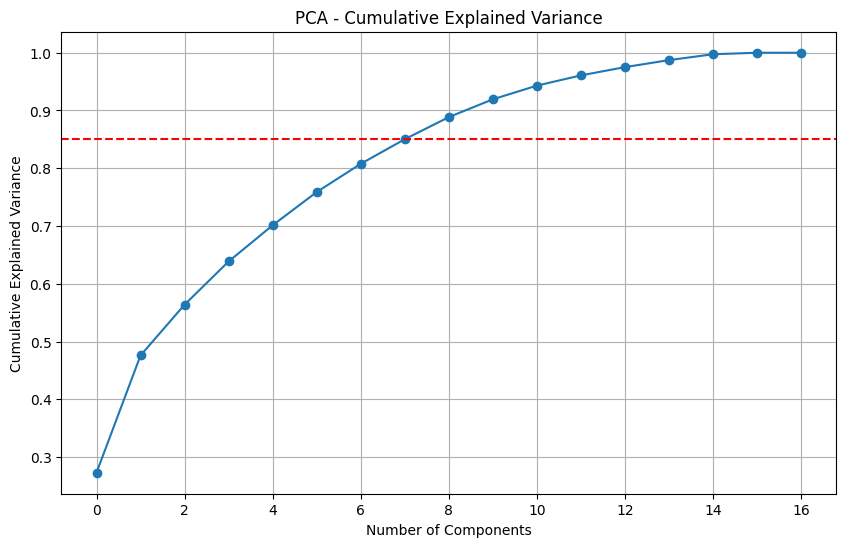

In [ ]:
# PCA for all components
pca_full = PCA()
pca_full.fit(df_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.85, color='r', linestyle='--')
plt.show()

### 🎯 **Step 6: PCA with 2 Components for Visualization**

In [ ]:
# PCA with 2 components
pca_2 = PCA(n_components=2)
df_pca_2 = pca_2.fit_transform(df_scaled)

# Convert to DataFrame
pca_df = pd.DataFrame(data=df_pca_2, columns=['PCA1', 'PCA2'])
pca_df.head()

,PCA1,PCA2
0,-1.682220,-1.076451
1,-1.138295,2.506477
2,0.969684,-0.383520
3,-0.873628,0.043166
4,-1.599434,-0.688581


### 📊 **Step 7: Find Two Columns with Most Covariance in PCA**

In [ ]:
# Covariance matrix
cov_matrix = pca_2.get_covariance()
cov_df = pd.DataFrame(cov_matrix, columns=df_imputed.columns, index=df_imputed.columns)

# Find the two columns with the highest absolute covariance
sorted_cov = cov_df.abs().unstack().sort_values(ascending=False)
top_cov = sorted_cov[sorted_cov.index.get_level_values(0) != sorted_cov.index.get_level_values(1)]
top_cov.head(1)

PURCHASES  PURCHASES_TRX    0.648397
dtype: float64

### 🔬 **Step 8: Interpret PCA Covariance Matrix**

In [ ]:
# Display the covariance matrix from PCA
cov_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.101682,0.199781,0.215710,0.214238,0.116343,0.497510,-0.088763,0.099796,-0.093835,0.464647,0.464640,0.137382,0.362084,0.406107,0.217428,-0.165337,0.028138
BALANCE_FREQUENCY,0.199781,0.701020,0.215231,0.191694,0.156668,0.152516,0.084972,0.136409,0.066794,0.118636,0.132946,0.182515,0.191834,0.225357,0.091597,-0.006723,0.037735
PURCHASES,0.215710,0.215231,1.284392,0.584286,0.558764,0.012635,0.513047,0.488586,0.436562,-0.097547,-0.031805,0.648397,0.380498,0.473612,0.120091,0.197737,0.134426
ONEOFF_PURCHASES,0.214238,0.191694,0.584286,1.090807,0.468713,0.046203,0.416293,0.409706,0.352915,-0.046937,0.007225,0.544073,0.339527,0.419407,0.114581,0.151013,0.112772
INSTALLMENTS_PURCHASES,0.116343,0.156668,0.558764,0.468713,1.053976,-0.055072,0.448197,0.402441,0.383801,-0.144458,-0.088530,0.533421,0.275789,0.349177,0.073397,0.190091,0.110634
CASH_ADVANCE,0.497510,0.152516,0.012635,0.046203,-0.055072,1.147573,-0.269834,-0.050324,-0.250128,0.553288,0.531454,-0.061242,0.279604,0.298044,0.203884,-0.251001,-0.013082
PURCHASES_FREQUENCY,-0.088763,0.084972,0.513047,0.416293,0.448197,-0.269834,1.116200,0.393000,0.454686,-0.352601,-0.292120,0.518749,0.145184,0.205935,-0.012532,0.275439,0.107742
ONEOFF_PURCHASES_FREQUENCY,0.099796,0.136409,0.488586,0.409706,0.402441,-0.050324,0.393000,0.946152,0.336610,-0.128490,-0.079496,0.466713,0.240083,0.304188,0.063388,0.167215,0.096800
PURCHASES_INSTALLMENTS_FREQUENCY,-0.093835,0.066794,0.436562,0.352915,0.383801,-0.250128,0.454686,0.336610,0.990497,-0.320621,-0.268302,0.444125,0.113428,0.164502,-0.018144,0.243819,0.092256
CASH_ADVANCE_FREQUENCY,0.464647,0.118636,-0.097547,-0.046937,-0.144458,0.553288,-0.352601,-0.128490,-0.320621,1.164640,0.538217,-0.164958,0.219741,0.223374,0.185357,-0.283367,-0.034586


### 🧮 **Step 9: Elbow Method to Determine Optimal K**

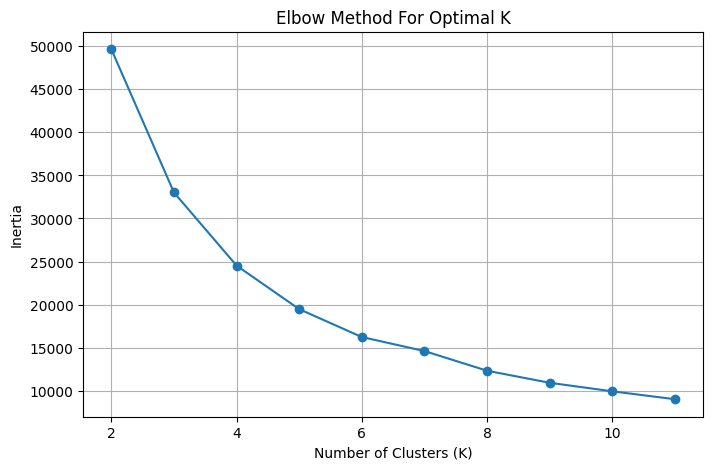

In [ ]:
# Elbow Method
inertia = []
K_range = range(2, 12)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()

### 🤖 **Step 10: Perform K-Means Clustering with Optimal K**

In [ ]:
# Assuming optimal K is 4 (you can update this based on your elbow plot)
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_final.fit_predict(pca_df)

# Add cluster labels
pca_df['Cluster'] = clusters

### 📈 **Step 11: Visualize the Clusters**

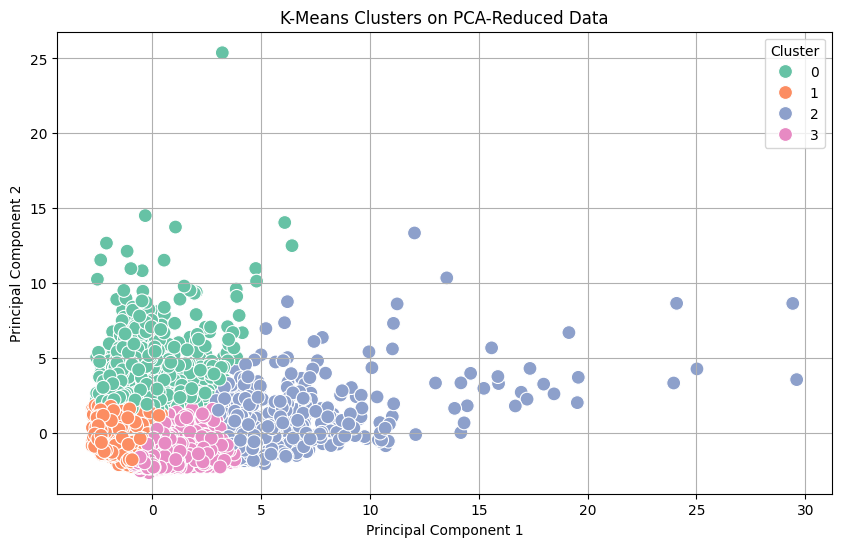

In [ ]:
# Cluster Visualization
plt.figure(figsize=(10,6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('K-Means Clusters on PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()